# An example of polygon plotting with folium  
We are going to demonstrate polygon plotting in this example with the help of folium

In [1]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

We make use of nybb dataset

In [2]:
path = gpd.datasets.get_path('nybb')
df = gpd.read_file(path)
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


Plot from the original dataset

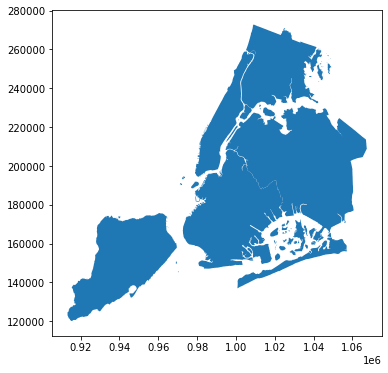

In [3]:
df.plot(figsize=(6, 6))
plt.show()

One thing to notice is that the values of the geometry do not directly represent the values of latitude of longitude in geographic coordinate system


In [4]:
print(df.crs)

epsg:2263


As folium(i.e. leaflet.js) by default takes input of values of latitude and longitude, we need to project the geometry first

In [5]:
df = df.to_crs(epsg=4326)
print(df.crs)
df.head()

epsg:4326


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


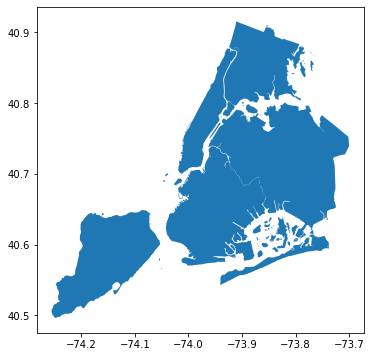

In [6]:
df.plot(figsize=(6, 6))
plt.show()

Initialize folium map object

In [7]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m

Overlay the boundaries of boroughs on map with borough name as popup

In [8]:
for _, r in df.iterrows():
    #without simplifying the representation of each borough, the map might not be displayed 
    #sim_geo = gpd.GeoSeries(r['geometry'])
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
m

Add marker showing the area and length of each borough

In [9]:
df['lat'] = df.centroid.y
df['lon'] = df.centroid.x
df.head()

<ipython-input-1-7cd59e1b644a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['lat'] = df.centroid.y
<ipython-input-1-7cd59e1b644a>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['lon'] = df.centroid.x


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,lat,lon
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",40.580858,-74.153369
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...",40.707603,-73.818485
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...",40.644734,-73.947677
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",40.777275,-73.967159
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",40.852626,-73.866524


In [10]:
for _, r in df.iterrows():
    folium.Marker(location=[r['lat'], r['lon']], popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)
    
m